In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import poisson
from scipy.stats import binom
from scipy.stats import nbinom
from distfit import distfit
import math
from tqdm import tqdm
warnings.filterwarnings('ignore')

In [48]:
data = pd.read_csv("plik7.csv")
data = data.drop(columns='Unnamed: 0')

In [49]:
for linia in np.unique(data['linia']):
    linia_data = data[data['linia'] == linia]
    year_counts = data['rok'].value_counts()

#opcje = ['norm', 'pareto', 'dweibull', 'lognorm', 'uniform']
opcje = ['norm', 't', 'pareto', 'gamma', 'dweibull', 'lognorm', 'uniform']

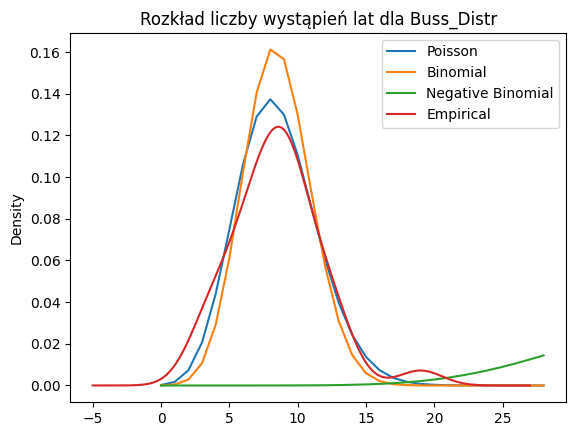

Średnia dla Buss_Distr: 8.51
Wariancja dla Buss_Distr: 10.49
Odchylenie standardowe dla Buss_Distr: 3.24


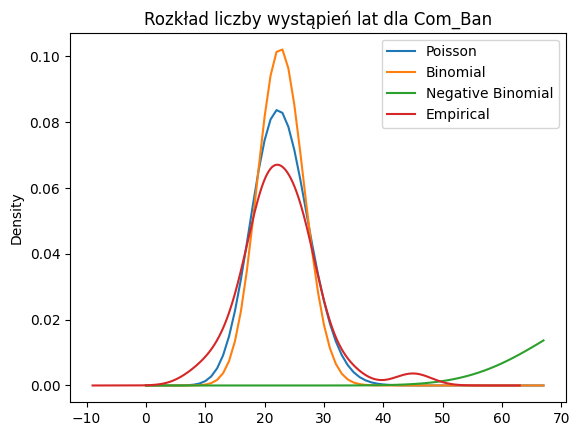

Średnia dla Com_Ban: 22.77
Wariancja dla Com_Ban: 40.59
Odchylenie standardowe dla Com_Ban: 6.37


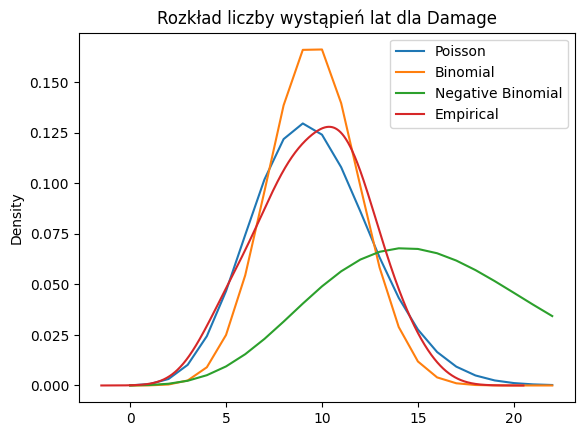

Średnia dla Damage: 9.57
Wariancja dla Damage: 7.25
Odchylenie standardowe dla Damage: 2.69


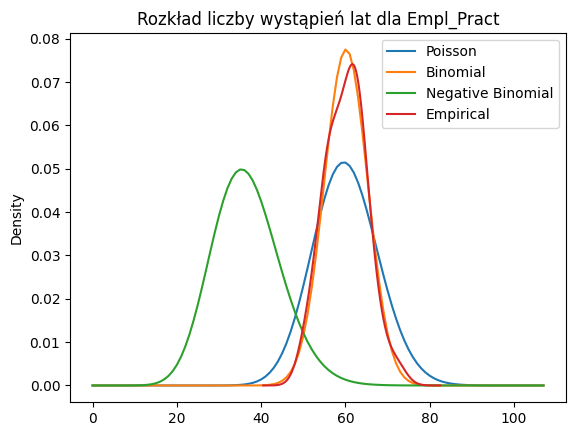

Średnia dla Empl_Pract: 60.09
Wariancja dla Empl_Pract: 23.08
Odchylenie standardowe dla Empl_Pract: 4.80


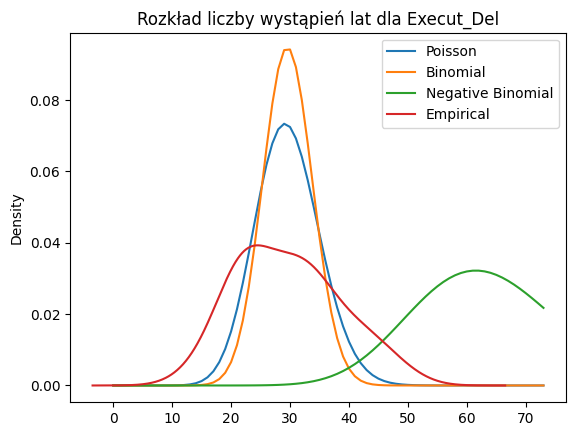

Średnia dla Execut_Del: 29.63
Wariancja dla Execut_Del: 74.77
Odchylenie standardowe dla Execut_Del: 8.65


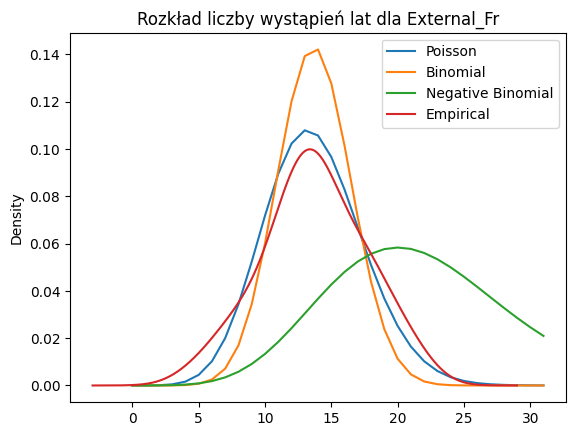

Średnia dla External_Fr: 13.71
Wariancja dla External_Fr: 14.62
Odchylenie standardowe dla External_Fr: 3.82


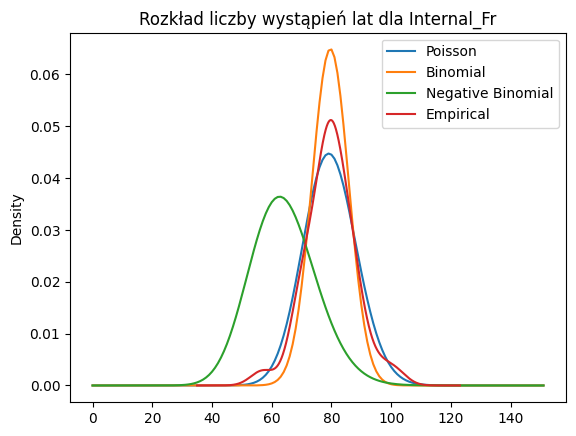

Średnia dla Internal_Fr: 79.60
Wariancja dla Internal_Fr: 66.84
Odchylenie standardowe dla Internal_Fr: 8.18


In [50]:
for linia in np.unique(data['linia']):
    linia_data = data[data['linia'] == linia]
    year_counts = linia_data['rok'].value_counts().sort_index()

    x = np.arange(0, max(year_counts)*1.5)
    plt.plot(x, poisson.pmf(x, year_counts.mean()), label='Poisson')

    n = max(x)
    p = year_counts.mean() / n
    plt.plot(x, binom.pmf(x, n, p), label='Binomial')
    
    r = year_counts.mean()*(1-p)/p
    plt.plot(x, nbinom.pmf(x, r, p), label='Negative Binomial')
    
    year_counts.plot(kind='kde', title=f'Rozkład liczby wystąpień lat dla {linia}',
                    xlabel='Liczba', ylabel='Frequency', label="Empirical")
    plt.legend()
    plt.show()
    print("Średnia dla {}: {:.2f}".format(linia,year_counts.mean()))
    print("Wariancja dla {}: {:.2f}".format(linia,year_counts.std()**2))
    print("Odchylenie standardowe dla {}: {:.2f}".format(linia,year_counts.std()))
    # dfit = distfit(method="discrete", distr="nbinom")
    # dfit.fit_transform(year_counts, verbose=False)
    # distr = dfit.model
    # print("Dopasowany rozkład dla {}: {}".format(linia,distr['name'])) 

Średnia dla Buss_Distr: 28000.00
Odchylenie standardowe dla Buss_Distr: 26882.76
Dopasowany rozkład dla Buss_Distr: expon


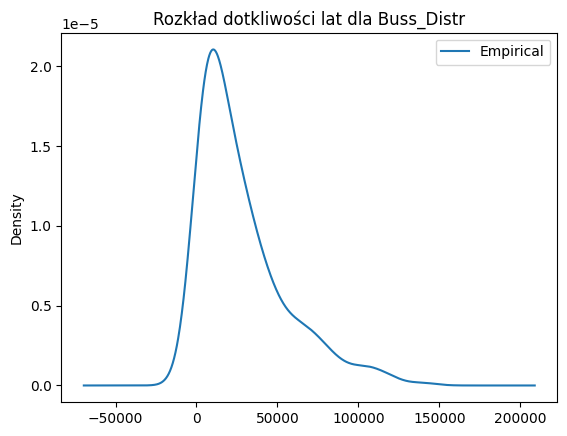

Średnia dla Com_Ban: 37000.00
Odchylenie standardowe dla Com_Ban: 39502.69
Dopasowany rozkład dla Com_Ban: beta


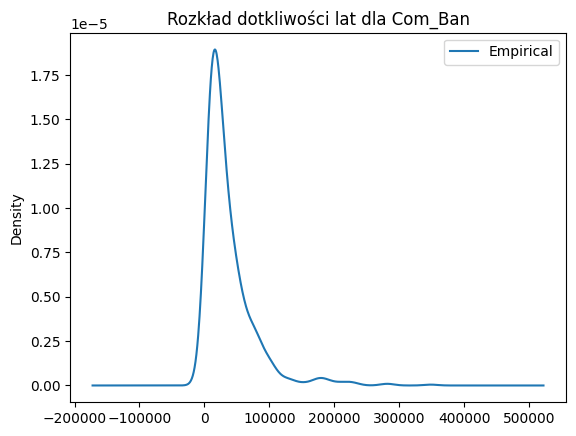

Średnia dla Damage: 5004.57
Odchylenie standardowe dla Damage: 28220.88
Dopasowany rozkład dla Damage: pareto


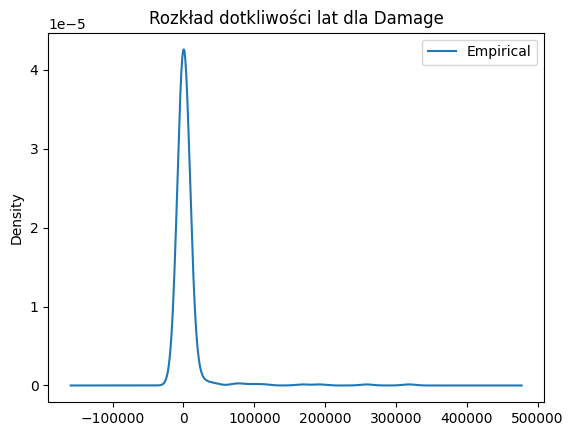

Średnia dla Empl_Pract: 23000.00
Odchylenie standardowe dla Empl_Pract: 4503.38
Dopasowany rozkład dla Empl_Pract: beta


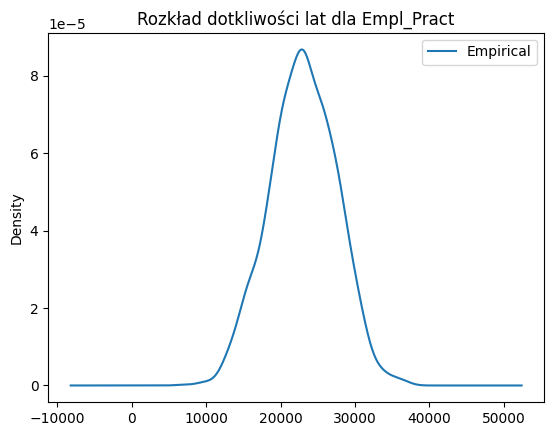

Średnia dla Execut_Del: 3000.02
Odchylenie standardowe dla Execut_Del: 3033.54
Dopasowany rozkład dla Execut_Del: expon


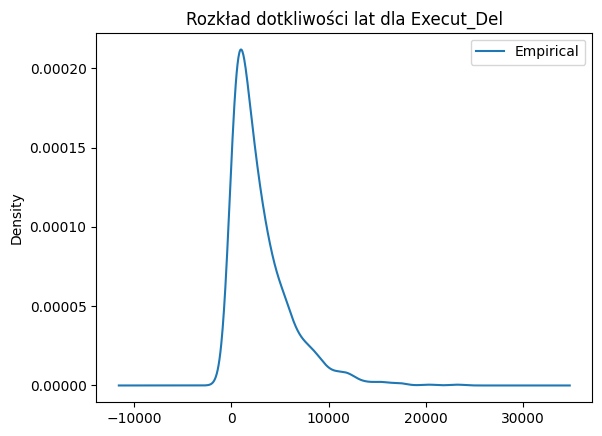

Średnia dla External_Fr: 5000.00
Odchylenie standardowe dla External_Fr: 965.86
Dopasowany rozkład dla External_Fr: loggamma


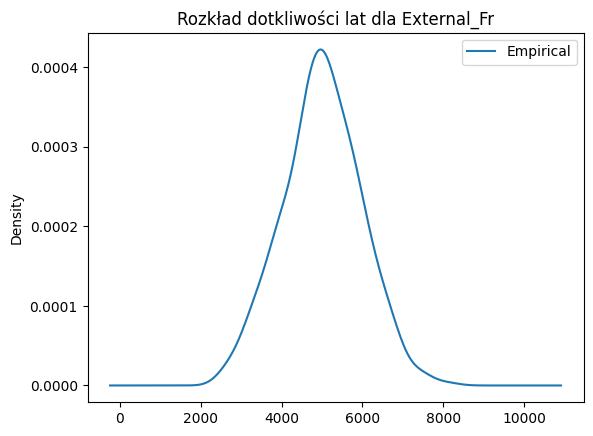

Średnia dla Internal_Fr: 3002.07
Odchylenie standardowe dla Internal_Fr: 25953.40
Dopasowany rozkład dla Internal_Fr: pareto


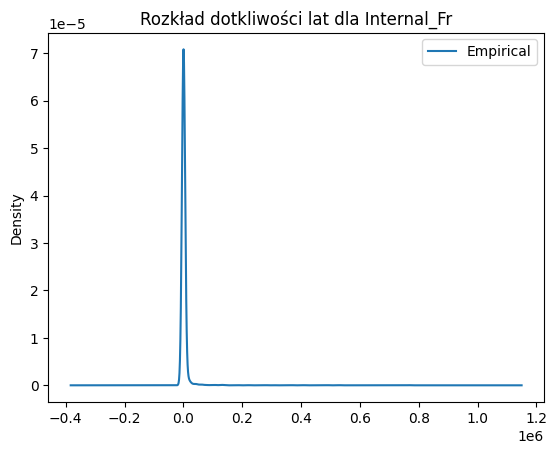

In [51]:
for linia in np.unique(data['linia']):
    linia_data = data[data['linia'] == linia]

    print("Średnia dla {}: {:.2f}".format(linia,linia_data['strata'].mean()))
    print("Odchylenie standardowe dla {}: {:.2f}".format(linia,linia_data['strata'].std()))
    dfitplot = distfit()
    dfitplot.fit_transform(linia_data['strata'], verbose=False)
    distr = dfitplot.model
    print("Dopasowany rozkład dla {}: {}".format(linia,distr['name'])) 

    linia_data['strata'].plot(kind='kde', title=f'Rozkład dotkliwości lat dla {linia}',
                    xlabel='Liczba', ylabel='Strata', label="Empirical")
    plt.legend()
    plt.show()   


In [52]:
strata_distributions = {}
freq_distributions = {}

dfit_strata = distfit(distr=opcje)
dfit_freq = distfit(method="discrete", distr=["binom", "nbinom", "poisson"])

for linia in np.unique(data['linia']):
    linia_data = data[data['linia'] == linia]
    
    dfit_strata.fit_transform(linia_data['strata'], verbose=False)
    distr_strata = dfit_strata.model['model']
    strata_distributions[linia]=(distr_strata)

    year_counts = linia_data['rok'].value_counts().sort_index()
    dfit_freq.fit_transform(year_counts, verbose=False)
    distr_freq = dfit_freq.model['model']
    freq_distributions[linia]=(distr_freq)

In [56]:
# scenariusze = pd.DataFrame(columns=['opVAR', 'opES'])
# m = 10
# n = 10
# for i in tqdm(range(m)):
#         straty = []
#         for j in tqdm(range(n)):
#             strata = 0
#             for linia in np.unique(data['linia']):
#                 freq = (round(freq_distributions[linia].rvs()) if freq_distributions[linia].rvs() > 0 else 0)
#                 for k in range(freq):
#                     strata += (strata_distributions[linia].rvs() if strata_distributions[linia].rvs() > 0 else 0)
#             straty.append(strata)
#         opVAR = np.percentile(straty, 99.9)
#         opES = np.mean([x for x in straty if x > opVAR])
#         scenariusze = scenariusze.append({'opVAR': opVAR, 'opES': opES}, ignore_index=True)
# print(scenariusze['opVAR'].values)
# print(scenariusze['opES'].values)

100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

[485895701718.7482 68211816.58740424 8675015.855885414 6787980.03699378
 40768917.4943858 20221653.29508457 6581365.179436831 94756198158.55658
 77834025.10882398 274063301.7340625]
[489988810453.6837 68729992.46556512 8713026.770019345 6800958.048102978
 41071688.10297749 20321015.624196555 6584763.875161443 95616628320.03998
 78442336.03061469 275667857.72049195]


In [58]:
opVars = []
opES = []
m = 10
n = 10
for i in tqdm(range(m)):
    straty = np.zeros(n)
    for j in tqdm(range(n)):
        strata = 0
        for linia in np.unique(data['linia']):
            freq = round(freq_distributions[linia].rvs()) if freq_distributions[linia].rvs() > 0 else 0
            for k in range(freq):
                strata += strata_distributions[linia].rvs() if strata_distributions[linia].rvs() > 0 else 0
        straty[j] = strata
    opVars.append(np.percentile(straty, 99.9))
    opES.append(np.mean([x for x in straty if x > opVars[-1]]))
    
print(opVars)
print(opES)

100%|██████████| 10/10 [00:04<00:00,  2.39it/s]

[60072065.787217885, 8635312.336961433, 220291295.5478495, 26278546787.745117, 16102575.459806861, 542840850.6020839, 14701690.450085673, 19615191.81308556, 74948787.47767836, 16679704.267337007]
[60236155.24804291, 8679476.35000502, 221337618.2470871, 26516877757.51467, 16178868.346017733, 547609767.2966406, 14774592.238205805, 19762189.53197105, 75605017.85911046, 16756477.000285383]


In [59]:
# print(scenariusze['opVAR'])
# print(np.mean(scenariusze['opVAR'].values))

dla częstości - rozkłady Poissona, dwumianowy i ujemny dwumianowy
porównanie średniej i wariancji z próby.
- 𝐸𝑋 > 𝐷2𝑋 rozkład dwumianowy
- 𝐸𝑋 = 𝐷2𝑋 rozkład Poissona
- 𝐸𝑋 < 𝐷2𝑋 rozkład ujemny dwumianowy

Jeśli klasyczne metody zawodzą, to zawsze możemy szukać
innych rozkładów teoretycznych.
Np.
» rozkład geometryczny
» rozkład Pascala
» rozkład hipergeometryczny

W praktyce banki używają różnych rozkładów, które mają
modelować dotkliwość strat. Można spotkać się z:
• rozkładem logarytmiczno-normalnym,
• rozkładem wykładniczym,
• rozkładem Weibulla,
• rozkładem Pareto,
• rozkładem wartości ekstremalnych itp.

Są trzy główne testy dopasowania danych empirycznych
do rozkładów teoretycznych:
- test chi-kwadrat Pearsona,
- test Kołmogorowa-Smirnowa (Lilieforsa),
- test Andersona-Darlinga.
» W każdym przypadku hipotezy mają postać: H0: dane mogą
być opisane rozkładem … przy H1: dane nie mogą być …

dla każdej linii: 
ile jest wydarzeń dla każdego roku - na tej podstawie wyznaczyć rozkład częstości, na jego podstawie przypisać rozkład teoretyczny (wydarzenia/rok) i z niego wylosować scenariusz liczby zdarzeń
jaka jest dotkliwość ogółem (?), wyznaczyć rozkład, na jego podstawie przypisać rozkład teoretyczny itd. analogicznie jak wyżej